In [ ]:
# import libraries
import pandas as pd
import numpy as np

# libraries for data preprocessing
import nltk
#for tokenization
from nltk.tokenize import word_tokenize
#for lemmatisation
from nltk.stem import WordNetLemmatizer
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt

RANDOM_SEED = 100

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# load the data set
df = pd.read_csv('/content/drive/MyDrive/Mental-health-related-subreddits.csv')

print(df.shape)
df.head()

(488472, 3)


,Title,Text,Subreddit
0,exposure does not work!,I have struggled with social anxiety from chil...,Anxiety
1,Panic attack? derealization? can't go to docto...,"Back in March (I know, a while ago D:), I woke...",Anxiety
2,How long can a panic attack last?!,I've been withdrawing from medicines lately (e...,Anxiety
3,Stepping stones,"First time poster, long time lurker. \n\nI've ...",Anxiety
4,"Coping with anxiety over climate change, on th...","Hi all,\n\nI made a throwaway account as my ma...",Anxiety


In [ ]:
#filter out the mental health labels required
anxiety=df[df['Subreddit']=='Anxiety']
depression=df[df['Subreddit']=='depression']

In [ ]:
#select 10000 records for each mental health problem
anxiety=anxiety.sample(n=10000)
depression=depression.sample(n=10000)


In [ ]:
anxiety

,Title,Text,Subreddit
32548,My feelings of lonliness and worthlessness are...,My feelings of lonliness came back last night....,Anxiety
32221,Need some advice. I’m really falling for this ...,Hey guys. I’m really crushing on this girl at ...,Anxiety
63937,Found out co-workers and bosses are having gro...,"Recently, I have been feeling a little inadequ...",Anxiety
53617,"Anxiety makes me feel physically sick, how to ...",I have had Anxiety for the last year or so (mi...,Anxiety
63171,Need someone to talk to,Need someone to talk to. I’m feeling pretty sa...,Anxiety
...,...,...,...
35781,"Reasons to panic, and why it's ok.",So i want to explain something really importan...,Anxiety
61656,You ever get anxiety so bad your mouth hurts l...,I feel like I spent a few days clamping my tee...,Anxiety
40421,Am I having an an anxiety attack or is this re...,"I’m like hyperventilating right now. Ok, I’m n...",Anxiety
9854,Is This anxiety?,Heart has been beating really heavily 24/7 for...,Anxiety


In [ ]:
depression

,Title,Text,Subreddit
178236,Senior in college. Living by myself now. Basic...,1st year- lived in the dorms; saw friends ever...,depression
253068,Really just cba with life,I'd really love to have a reason to be upset a...,depression
228997,The boyfriend won't leave me alone when I'm de...,I found text messages between him and my mom. ...,depression
246792,I’m not sure if I’m depressed but here’s a sho...,25 yo Male.. I’ve always been kinda sad but I ...,depression
271981,Fighting medication,"I've been undergoing some severe mood swings, ...",depression
...,...,...,...
250331,I think I'm going insane,I'm finding it hard to write this because I've...,depression
184963,Sometimes I prefer the bad days.,Feeling like I'm over being depressed and havi...,depression
307356,Benzos are making me suicidal.,"I'm on Klonopin 1mg, not a strong dose but it'...",depression
232912,Feel like im losing my mind,I have so much emotion running through my mind...,depression


In [ ]:
#combine the dataframes to 1 dataframe
frames=[anxiety,depression]
df=pd.concat(frames)

In [ ]:
# df.to_csv('/content/drive/MyDrive/subreddits.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/subreddits.csv')


<Axes: xlabel='Subreddit', ylabel='count'>

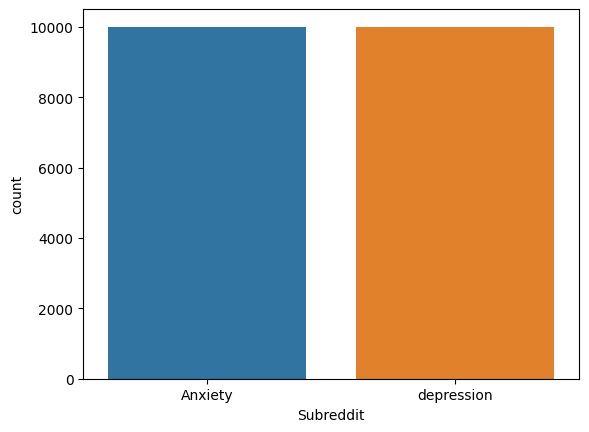

In [ ]:
sns.countplot(x=df['Subreddit'])


In [ ]:
df = df.dropna()

print(f'Number of entries: {len(df)}')

Number of entries: 20000


# Preprocessing

### Tokenisation
Using word_tokenize since its normal text

In [ ]:
# run thru each record in the text columm and convert text to tokens
tokenized_text = [word_tokenize(text) for text in df['Text']]
#join the text into sentences using method join
tokenized_sentences = [' '.join(tokens) for tokens in tokenized_text]

# creating a new column in the dataframe with the tokenized sentences
df['Tokenized_Text'] = tokenized_sentences
df.head()



,Unnamed: 0,Title,Text,Subreddit,Tokenized_Text
0,57177,"Does it feel like your brain ""short circuits""?","This has happened once before, only during a p...",Anxiety,"This has happened once before , only during a ..."
1,22650,Does anyone else feel comforted by lying on th...,"When I'm really anxious, a lot of times my ins...",Anxiety,"When I 'm really anxious , a lot of times my i..."
2,41037,Anxiety about Hentai,"Hey,\n\nI know this may seem completely odd fo...",Anxiety,"Hey , I know this may seem completely odd for ..."
3,36212,Trying to do my best - unsure if an obsession,I’ve been diagnosed with GAD for quite sometim...,Anxiety,I ’ ve been diagnosed with GAD for quite somet...
4,3390,How do I get over my fear of driving/ getting ...,I live in Ohio and I would like to learn how t...,Anxiety,I live in Ohio and I would like to learn how t...


### Normalizing Text
I will use lemmatisation as opposed to stemming as it produces more accurate results representing the base word

In [ ]:
lemmtizer = WordNetLemmatizer()

lemmatized_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in tokenized_text:
  lemma_words = [lemmtizer.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  lemmatized_sentences.append(lemma_sentence)

print(lemmatized_sentences[:2])

# add new column to data frame
df['Lemmatized_Text'] = lemmatized_sentences

df

["This ha happened once before , only during a panic attack , but it happened last night when I had a really awful headache . I close my eye , try to go to sleep , or at the very least relax , and then it happens . My thought start racing , but so quickly that they make no sense . It 's sometimes beyond noneensical , and since I 'm not consciously thinking these strange thought , the only way they make sense ( at least while describing it ) is that these thought are n't my own .", "When I 'm really anxious , a lot of time my instinct is to lay on my bedroom floor . Even if I 'm in my bed , I will get out and lay on the floor . DAE experience this or know why this is ?"]


,Unnamed: 0,Title,Text,Subreddit,Tokenized_Text,Lemmatized_Text
0,57177,"Does it feel like your brain ""short circuits""?","This has happened once before, only during a p...",Anxiety,"This has happened once before , only during a ...","This ha happened once before , only during a p..."
1,22650,Does anyone else feel comforted by lying on th...,"When I'm really anxious, a lot of times my ins...",Anxiety,"When I 'm really anxious , a lot of times my i...","When I 'm really anxious , a lot of time my in..."
2,41037,Anxiety about Hentai,"Hey,\n\nI know this may seem completely odd fo...",Anxiety,"Hey , I know this may seem completely odd for ...","Hey , I know this may seem completely odd for ..."
3,36212,Trying to do my best - unsure if an obsession,I’ve been diagnosed with GAD for quite sometim...,Anxiety,I ’ ve been diagnosed with GAD for quite somet...,I ’ ve been diagnosed with GAD for quite somet...
4,3390,How do I get over my fear of driving/ getting ...,I live in Ohio and I would like to learn how t...,Anxiety,I live in Ohio and I would like to learn how t...,I live in Ohio and I would like to learn how t...
...,...,...,...,...,...,...
19995,241131,Pain,I've severe depression for about 4 years now.\...,depression,I 've severe depression for about 4 years now ...,I 've severe depression for about 4 year now ....
19996,204328,Some word vomit about sexual abuse - feat. sel...,"First of all, to summarize my feelings, a post...",depression,"First of all , to summarize my feelings , a po...","First of all , to summarize my feeling , a pos..."
19997,237420,I’m at a crossroads after making several quest...,I had a really really amazing job in a city I’...,depression,I had a really really amazing job in a city I ...,I had a really really amazing job in a city I ...
19998,334189,Does your depression push you forward like this?,When I was 15 I began to fall into my own hell...,depression,When I was 15 I began to fall into my own hell...,When I wa 15 I began to fall into my own hell ...


Spliting Dataset into train and test

Split the raw data, tokenized and lemmatized data so that i can run experiments and compare the effects of each preprocessing techniques



In [ ]:
#  raw text split
X_train_text, X_val_text, y_train, y_val = train_test_split(df['Text'], df['Subreddit'], test_size=0.3, random_state=42)

# tokenized text split
X_train_tokenized_text, X_val_tokenized_text, y_train, y_val = train_test_split(df['Tokenized_Text'], df['Subreddit'], test_size=0.3, random_state=42)


# lemmatised text split
X_train_lemmatized_text, X_val_lemmatized_text, y_train, y_val = train_test_split(df['Lemmatized_Text'], df['Subreddit'], test_size=0.3, random_state=42)




### Classifiers (SVM, Naive Bayes, Logistic Regression)
Naive Bayes (raw text split)


In [ ]:
# libraries for ML algorithms
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#metrics and confusion matrix plot
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

In [ ]:
X_train_dense = X_train.toarray()
X_val_dense = X_val.toarray()

# Create DataFrames for train and validation sets
train_df = pd.DataFrame(data=X_train_dense, columns=vectorizer.get_feature_names_out())
val_df = pd.DataFrame(data=X_val_dense, columns=vectorizer.get_feature_names_out())

# Display the DataFrames
print("Train Data:")
print(train_df)

print("\nValidation Data:")
print(val_df)


Train Data:
        00  000  0000000001  0001  000iu  000kms  00_jm  00am  00pm   01  ...  \
0      0.0  0.0         0.0   0.0    0.0     0.0    0.0   0.0   0.0  0.0  ...   
1      0.0  0.0         0.0   0.0    0.0     0.0    0.0   0.0   0.0  0.0  ...   
2      0.0  0.0         0.0   0.0    0.0     0.0    0.0   0.0   0.0  0.0  ...   
3      0.0  0.0         0.0   0.0    0.0     0.0    0.0   0.0   0.0  0.0  ...   
4      0.0  0.0         0.0   0.0    0.0     0.0    0.0   0.0   0.0  0.0  ...   
...    ...  ...         ...   ...    ...     ...    ...   ...   ...  ...  ...   
13995  0.0  0.0         0.0   0.0    0.0     0.0    0.0   0.0   0.0  0.0  ...   
13996  0.0  0.0         0.0   0.0    0.0     0.0    0.0   0.0   0.0  0.0  ...   
13997  0.0  0.0         0.0   0.0    0.0     0.0    0.0   0.0   0.0  0.0  ...   
13998  0.0  0.0         0.0   0.0    0.0     0.0    0.0   0.0   0.0  0.0  ...   
13999  0.0  0.0         0.0   0.0    0.0     0.0    0.0   0.0   0.0  0.0  ...   

       zoomies 

In [ ]:
train_df

,00,000,0000000001,0001,000iu,000kms,00_jm,00am,00pm,01,...,zoomies,zooming,zopiclone,zrcg7ze7lh,zur2q,zyprexa,zyrtec,zzquil,½year,æther
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
 # build model
classifier1 = MultinomialNB()
classifier1.fit(X_train, y_train)

MultinomialNB()

0.81


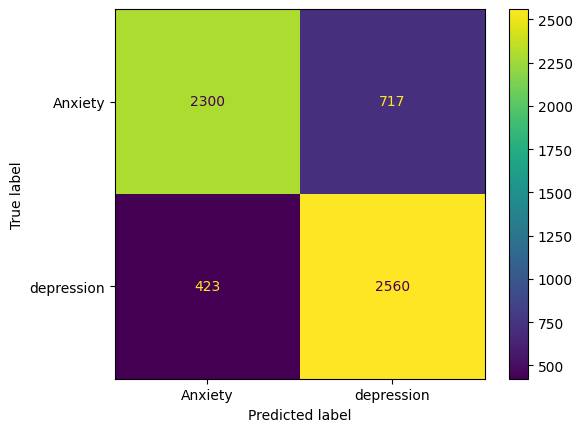

In [ ]:
# Make predictions on test data
y_pred = classifier1.predict(X_val)

# evalution
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm, display_labels=classifier1.classes_).plot()
accuracy_sc=accuracy_score(y_val, y_pred)
print(accuracy_sc)


Naive Bayes (tokenized text split)


In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenized_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenized_text)
X_val = vectorizer.transform(X_val_tokenized_text)

In [ ]:
 # build model
classifier2 = MultinomialNB()
classifier2.fit(X_train, y_train)

MultinomialNB()

0.8091666666666667


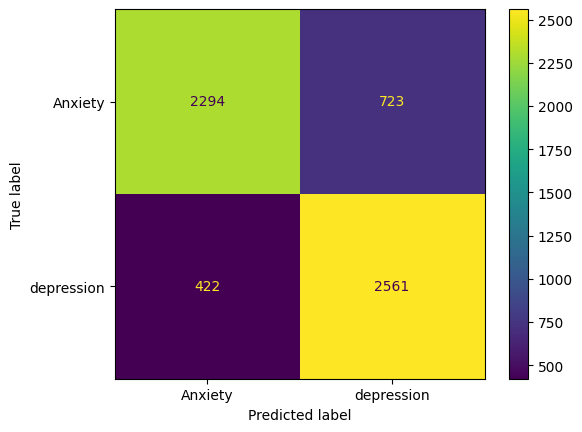

In [ ]:
# Make predictions on test data
y_pred = classifier2.predict(X_val)

# evalution
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm, display_labels=classifier2.classes_).plot()
accuracy_sc=accuracy_score(y_val, y_pred)
print(accuracy_sc)

Naive Bayes (lemmatized text split)

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatized_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatized_text)
X_val = vectorizer.transform(X_val_lemmatized_text)

In [ ]:
 # build model
classifier3 = MultinomialNB()
classifier3.fit(X_train, y_train)

MultinomialNB()

0.8156666666666667


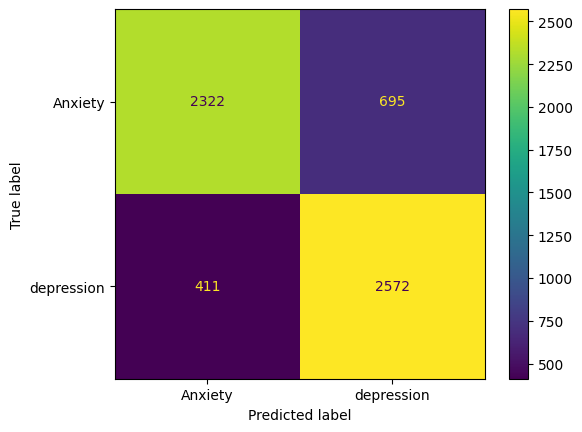

In [ ]:
# Make predictions on test data
y_pred = classifier3.predict(X_val)

# evalution
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm, display_labels=classifier3.classes_).plot()
accuracy_sc=accuracy_score(y_val, y_pred)
print(accuracy_sc)
